### Задача - на основании имеющихся данных о физических параметрах грибов, построить модель классификации о том, можно или нельзя есть данный гриб.

Target - колонка class

Все остальные - признаки

Постараться использовать все изученные техники:

- если есть, заполнить  пропуски
- посмотреть корреляции и выбрать только нужные признаки
- удалить выбросы (значения выпадающие за 90% квантиль)
- закодировать категориальные признаки
- оценить баланс классов

Построить модель и оценить результат

Оформить результат в виде блокнота, следующего наименования **ДЗ_Фамилия_Имя.ipynb** и положить в исходную папку



## Введение
В этом блокноте мы проведем анализ и моделирование данных о клиентах для предсказания их оттока. Мы будем использовать библиотеки Pandas, NumPy, Scikit-learn и Matplotlib.


## Обработка данных

In [1]:
# @title Загрузка бибилотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# @title Загрузка данных из cvs файла
data = pd.read_csv('mushroom_cleaned.csv.zip')

In [3]:
# @title Посмотрим на первые 5 строк нашего датасета:
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [4]:
# @title размер данных
data.shape

(54035, 9)

In [5]:
# @title Структура данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [6]:
# @title Проверим наличие пропусков в данных:
data.isna().sum()

,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0
class,0


все данные в данной таблице являются числовыми и пропуски отсусвуют, какой подарок)

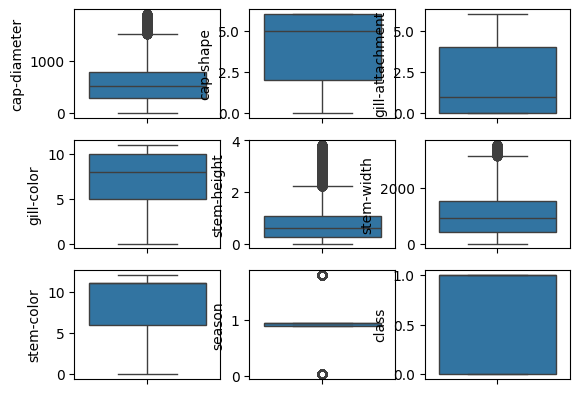

In [7]:
# @title Визуализация выбросов
c = 1
for dt in data:

    plt.subplot(3,3,c)
    c += 1
    sns.boxplot(data[dt])
    plt.legend

plt.show()

<Axes: >

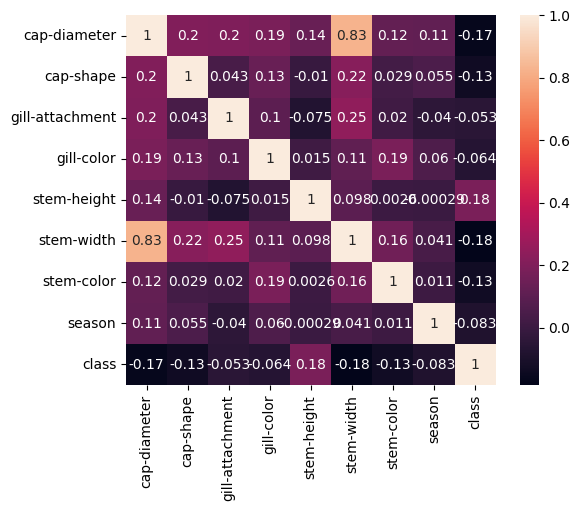

In [8]:
# @title Проверим корреляцию данных
sns.heatmap(
    data.corr(),
    annot=True,
    fmt='.2g',
    square=True
)

как можно заметить что cap-diameters имею сильную корреляцию с другими данными , попробуем от него избавиться


<Axes: >

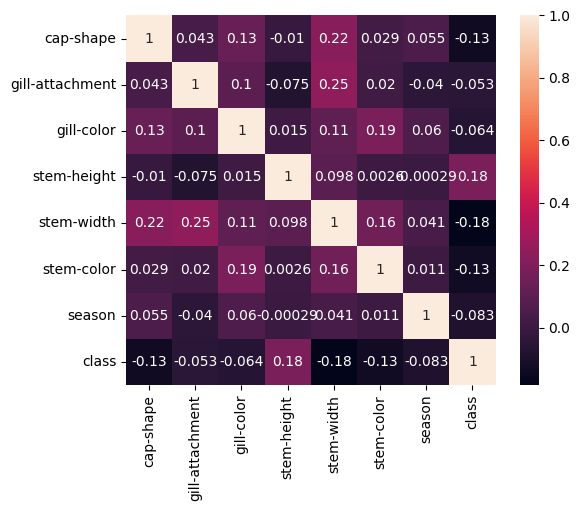

In [9]:
sns.heatmap(
    data.drop(['cap-diameter'], axis =1 ).corr(),
    annot=True,
    fmt='.2g',
    square=True
)

видно что намного лучше без этого столбика)

In [3]:
# @title удаление cap-diameter
data.drop(['cap-diameter'], axis = 1)

,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,2,2,10,3.807467,1545,11,1.804273,1
1,2,2,10,3.807467,1557,11,1.804273,1
2,2,2,10,3.612496,1566,11,1.804273,1
3,6,2,10,3.787572,1566,11,1.804273,1
4,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...
54030,5,3,2,0.887740,569,12,0.943195,1
54031,2,3,2,1.186164,490,12,0.943195,1
54032,5,3,2,0.915593,584,12,0.888450,1
54033,2,3,2,1.034963,491,12,0.888450,1


In [11]:
# @title Оценка баланса классов
class_balance = data['class'].value_counts(normalize=True)
print("Баланс классов:\n", class_balance)

Баланс классов:
 class
1    0.549181
0    0.450819
Name: proportion, dtype: float64



### Разделение данных на обучающую и тестовую выборки
Разделим данные на обучающую и тестовую выборки:



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , mean_absolute_error, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_train,X_test,y_train,y_test = train_test_split(
                        data.drop(['class'], axis = 1),
                        data['class'],
                        test_size=0.15,
                        random_state=42)

## Моделирование
### Обучение модели Logistic Regresion
Обучим модель Logistic Regresion:

In [13]:
# @title Загрузка Logistic Regresion
from sklearn.linear_model import LogisticRegression

In [14]:
# @title Построкай конвеера со стандартным классификаторо и логистической регресией

pipe_linear = Pipeline(
    [
        ('SR', StandardScaler()),
        ('Classifier', LogisticRegression())
    ]
)
pipe_linear.fit(X_train,y_train)

Pipeline(steps=[('SR', StandardScaler()), ('Classifier', LogisticRegression())])

In [15]:
# @title оценка Качества модели
y_pred_linear = pipe_linear.predict(X_test)

mae = mean_absolute_error(y_pred_linear, y_test)
print(f'Средняя обсалютная ошибка : {mae:.4f}')
acc = accuracy_score(y_pred_linear,y_test)
print(f'Точность модели : {acc:.4f}')
print(classification_report(y_test, y_pred_linear))

Средняя обсалютная ошибка : 0.3610
Точность модели : 0.6390
              precision    recall  f1-score   support

           0       0.61      0.54      0.58      3656
           1       0.66      0.72      0.69      4450

    accuracy                           0.64      8106
   macro avg       0.63      0.63      0.63      8106
weighted avg       0.64      0.64      0.64      8106



In [16]:
# @title Визуализация матрицы путаницы для Logistical Regression
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, pipe_linear.predict(X_test)).ravel()

print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

True Negative: 1988
False Positive: 1668
False Negative: 1258
True Positive: 3192


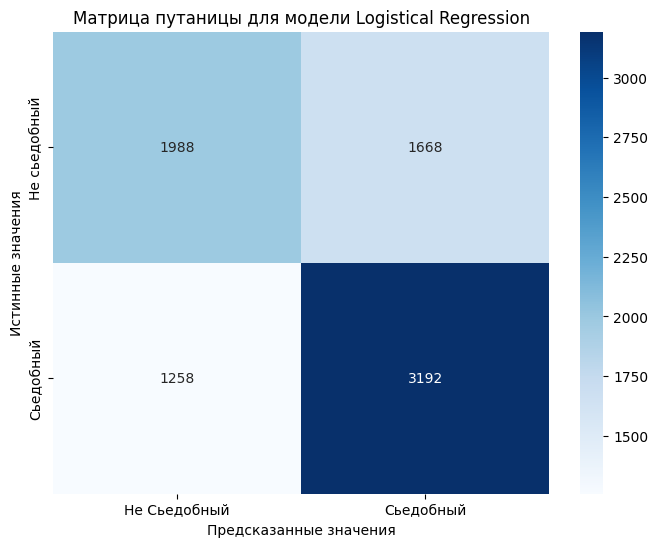

In [17]:

conf_matrix = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Не Cьедобный', 'Сьедобный'],
            yticklabels=['Не сьедобный', 'Сьедобный'])
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица путаницы для модели Logistical Regression')
plt.show()


### Построение ROC-кривой для Logisrial Regresion
Теперь построим ROC-кривую для оценки качества модели:



In [18]:
# @title Вероятности для положительного класса
y_probs_linear = pipe_linear.predict_proba(X_test)[:, 1]

In [19]:
# @title Вычисляем значения для ROC-кривой линйной модели
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_probs_linear)
roc_auc = auc(fpr, tpr)

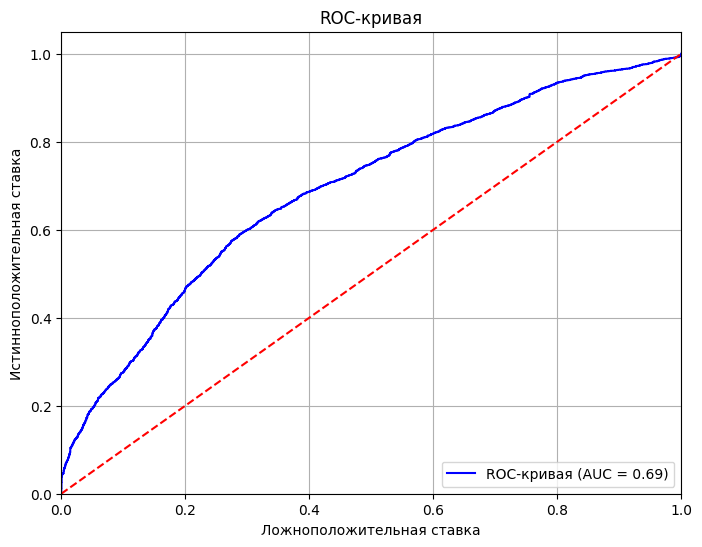

In [20]:
# @title Визуализируем ROC-кривую для Logistical Regresion
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC-кривая (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного выбора
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительная ставка')
plt.ylabel('Истинноположительная ставка')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.grid()
plt.show()

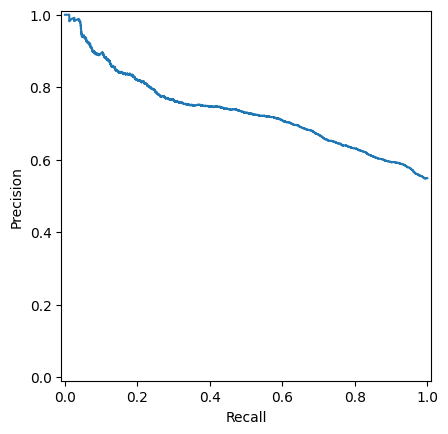

In [21]:
# @title Получим всевозможные пары Precision, Recall
### И нарисуем PR-кривую
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, pipe_linear.predict_proba(X_test)[:, 1])
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [22]:
# @title Оценка Модели
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print(f'Accuracy равно: {accuracy_score(y_test, pipe_linear.predict(X_test)):.3f}' )
print(f'Precision равно: {precision_score(y_test, pipe_linear.predict(X_test)):.3f}' )
print(f'Recall равно: {recall_score(y_test, pipe_linear.predict(X_test)):.3f}' )
print(f'F-мера равно: {f1_score(y_test, pipe_linear.predict(X_test)):.3f}' )

Accuracy равно: 0.639
Precision равно: 0.657
Recall равно: 0.717
F-мера равно: 0.686


## Моделирование
### Обучение модели KNeighborsClassifier


In [23]:
# @title Обучим модель KNn:
pipe = Pipeline(
    [
        ('Scaler', StandardScaler()),
        ('Classifier', KNeighborsClassifier())
    ]
)

pipe.fit(X_train,y_train)


Pipeline(steps=[('Scaler', StandardScaler()),
                ('Classifier', KNeighborsClassifier())])


### Прогнозирование и оценка модели




In [24]:
# @title  Оценка Модели
y_pred = pipe.predict(X_test)

mae = mean_absolute_error(y_pred, y_test)
print(f'Средняя обсалютная ошибка : {mae:.4f}')
acc = accuracy_score(y_pred,y_test)
print(f'Точность модели : {acc:.4f}')
print(classification_report(y_test, y_pred))

Средняя обсалютная ошибка : 0.0101
Точность модели : 0.9899
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3656
           1       0.99      0.99      0.99      4450

    accuracy                           0.99      8106
   macro avg       0.99      0.99      0.99      8106
weighted avg       0.99      0.99      0.99      8106




### Визуализация матрицы путаницы для KNn
Визуализируем матрицу путаницы:



In [25]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, pipe.predict(X_test)).ravel()

print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

True Negative: 3599
False Positive: 57
False Negative: 25
True Positive: 4425


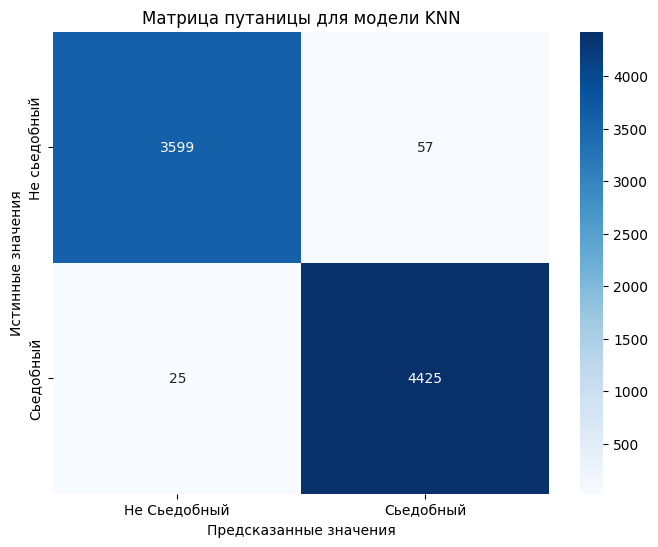

In [26]:

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Не Cьедобный', 'Сьедобный'],
            yticklabels=['Не сьедобный', 'Сьедобный'])
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица путаницы для модели KNN')
plt.show()


### Построение ROC-кривой для KNn
Теперь построим ROC-кривую для оценки качества модели:



In [27]:
# @title Получаем вероятности предсказаний для положительного класса
y_probs = pipe.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

In [28]:
# #title Вычисляем значения для ROC-кривой KNn модели
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

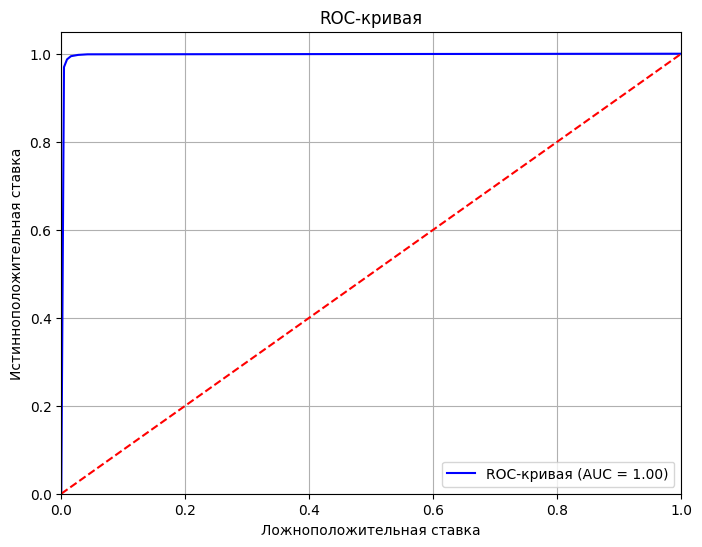

In [29]:
# @title Визуализируем ROC-кривую для KNn модели
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC-кривая (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного выбора
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительная ставка')
plt.ylabel('Истинноположительная ставка')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.grid()
plt.show()

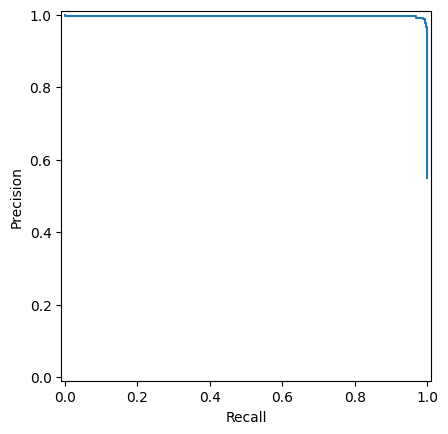

In [30]:
# @title Получим всевозможные пары Precision, Recall
### И нарисуем PR-кривую
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, pipe.predict_proba(X_test)[:, 1])
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print(f'Accuracy равно: {accuracy_score(y_test, pipe.predict(X_test)):.3f}' )
print(f'Precision равно: {precision_score(y_test, pipe.predict(X_test)):.3f}' )
print(f'Recall равно: {recall_score(y_test, pipe.predict(X_test)):.3f}' )
print(f'F-мера равно: {f1_score(y_test, pipe.predict(X_test)):.3f}' )

Accuracy равно: 0.990
Precision равно: 0.987
Recall равно: 0.994
F-мера равно: 0.991


## Моделирование
### Обучение модели Support Vector Mashine
Обучим модель SVC:


In [5]:
# @title Обучим модель SVC
from sklearn.svm import SVC
scaler = StandardScaler()

X_svc = scaler.fit_transform(
    data.drop(['class'], axis = 1)
)

X_train_svc , X_test_svc, y_train_svc, y_test_svc = train_test_split(
    X_svc,
    data['class'],
    random_state=42,
    test_size=0.2
)

In [ ]:
svc = SVC(kernel='sigmoid')
svc.fit(X_train_svc,y_train_svc)

SVC(kernel='sigmoid')

In [ ]:
svc_decision = svc.decision_function(X_test_svc)


### Прогнозирование и оценка модели
Сделаем прогнозы и оценим модель:



### Оценка Модели

In [5]:
# @title  Визуализация матрицы путаницы для SVC
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, svc.predict(X_test)).ravel()

print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

NameError: name 'svc' is not defined

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, svc.predict(X_test), labels=pipe.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,6))
cmp.plot(ax=ax)
plt.show()

In [ ]:
print(f'Accuracy равно: {accuracy_score(y_test, svc.predict(X_test)):.3f}' )
print(f'Precision равно: {precision_score(y_test, svc.predict(X_test)):.3f}' )
print(f'Recall равно: {recall_score(y_test, svc.predict(X_test)):.3f}' )
print(f'F-мера равно: {f1_score(y_test, svc.predict(X_test)):.3f}' )

In [ ]:
### Получим всевозможные пары Precision, Recall
### И нарисуем PR-кривую
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test_svc, svc_decision)
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [ ]:
# #title Вычисляем значения для ROC-кривой SVC модели
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test_svc, svc_decision)
roc_auc = auc(fpr, tpr)

In [ ]:
# @title Визуализируем ROC-кривую для SVC Regresion
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC-кривая (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного выбора
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительная ставка')
plt.ylabel('Истинноположительная ставка')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## Выводы
- Модель KNeighbors Classifier показала хорошую точность в предсказании сьедобности грибов, но мне кажеться что модель опорных векторов справилось лучше
- Наиболее важные признаки включают cap-shape, gill-attachment , gill-color,stem-height, stem-width, stem-color и season
